# Demonstrating Oct-Resnet50 on ImageNette

Imagenette has 10 easy classes from ImageNet. https://github.com/fastai/imagenette

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from fastai.vision import *
from octconv import *

## Get Data

In [2]:
path = untar_data(URLs.IMAGEWOOF)

In [3]:
bs, size = 24, 256

data = (ImageList.from_folder(path).split_by_folder(valid='val')
            .label_from_folder().transform(([flip_lr(p=0.5)], []), size=size)
            .databunch(bs=bs)
            .presize(size, scale=(0.35,1))
            .normalize(imagenet_stats))

In [4]:
model = oct_resnet50(0.125, num_classes=10).cuda()

## Fit Model for 5 epochs

Note that parameters are probably not initialized in the best way. I would run an LSUV init to make initial training better.

In [5]:
learn = Learner(data, model, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


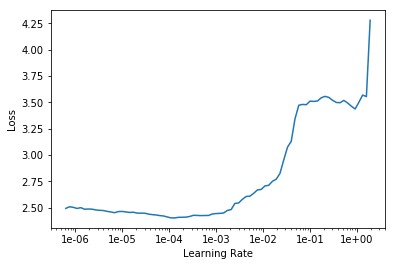

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.202810,2.177824,0.238000,08:03
1,1.981660,2.036349,0.298000,08:03
2,1.718541,1.702763,0.420000,08:03
3,1.406180,1.458748,0.498000,08:03
4,1.253628,1.196010,0.584000,08:03


In [8]:
learn.save('oct_resnet50')